In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils import *
from dataset import separate_frequency_bands, remove_electrical_noise

In [2]:
data = load_pickle('../Data/Dataset_4subjects_Exe_Obs')

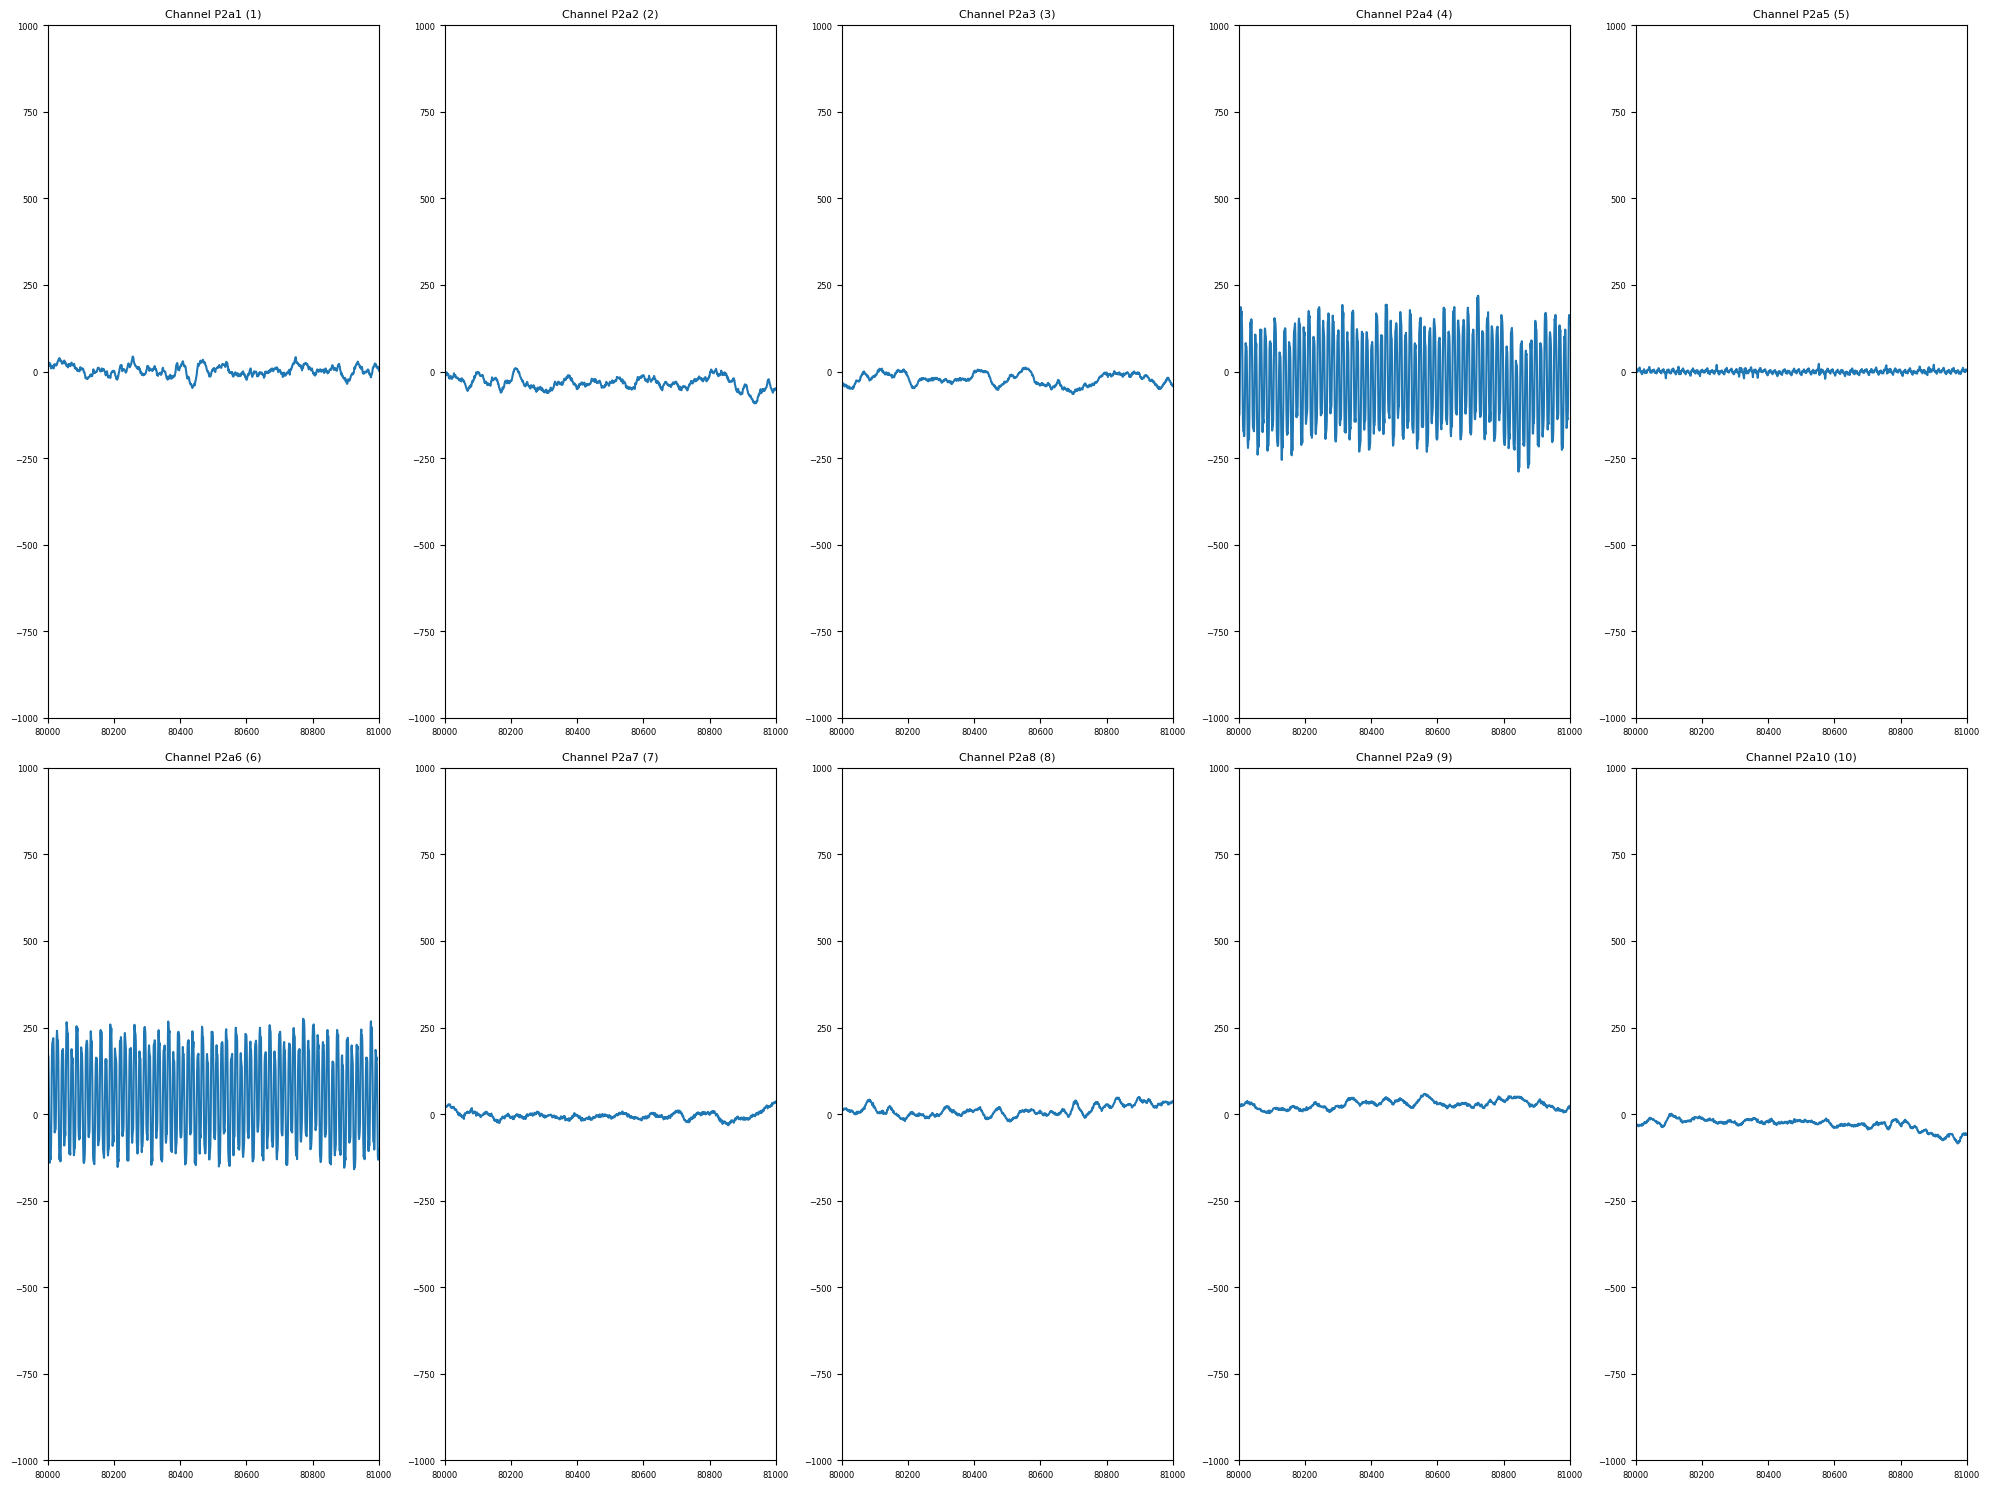

In [3]:
channels = data['s6']['sess1']['neural_data']
n_channels = 10

n_rows = 2
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to access each subplot by index

for channel_idx in range(n_channels):
    channel = data['s6']['sess1']['channel_labels'][channel_idx]
    sEEG_data = channels[channel_idx, :]
    
    # Plot on the corresponding subplot
    axes[channel_idx].plot(sEEG_data)
    axes[channel_idx].set_title(f'Channel {channel} ({channel_idx+1})', fontsize=8)
    axes[channel_idx].tick_params(axis='both', which='major', labelsize=6)
    axes[channel_idx].set_xlim(80000, 81000)
    axes[channel_idx].set_ylim(-1000, 1000)

plt.tight_layout()  # Adjust layout
plt.show()

100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


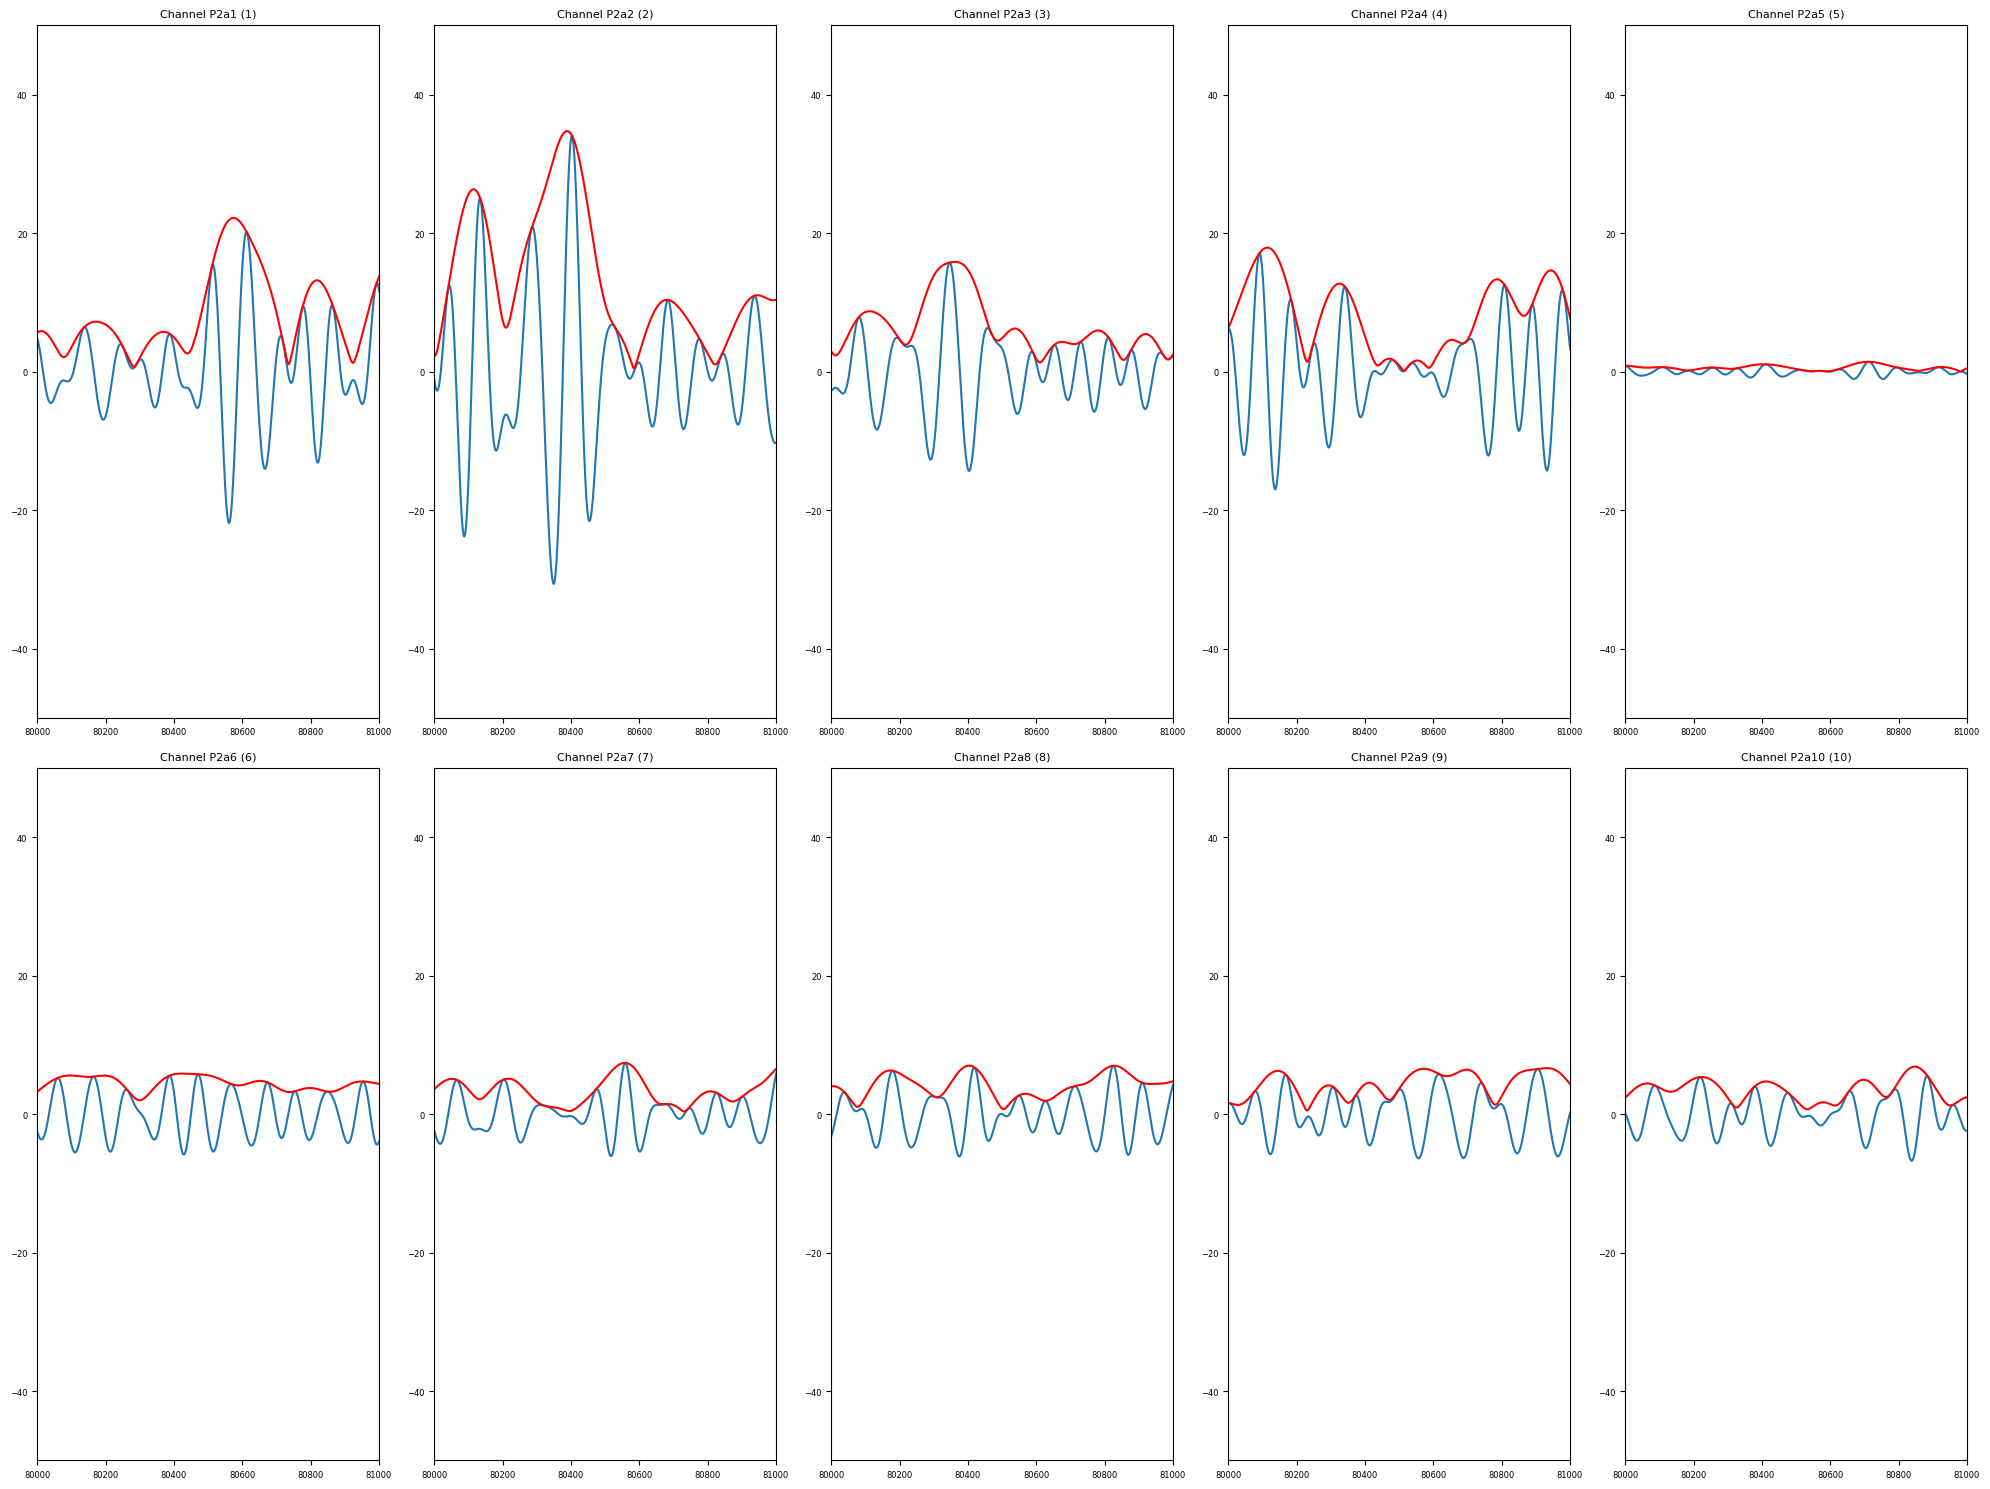

In [ ]:
from scipy.signal import hilbert

channels = data['s6']['sess1']['neural_data']
n_channels = 10

n_rows = 2
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to access each subplot by index

for channel_idx in tqdm(range(n_channels)):
    channel = data['s6']['sess1']['channel_labels'][channel_idx]
    sEEG_data = channels[channel_idx, :]
    signal = bandpass_filter(sEEG_data, 0.5, 150)
    
    # Plot on the corresponding subplot
    subsampled_data = sEEG_data[::2048//500]  # Subsample data
    filtered_data = bandpass_filter(subsampled_data, 13, 30) # Alpha band for testing purposes
    anat_signal = hilbert(filtered_data)
    envelope = np.abs(anat_signal)
    axes[channel_idx].plot(filtered_data)
    axes[channel_idx].plot(envelope, color='red')
    axes[channel_idx].set_title(f'Channel {channel} ({channel_idx+1})', fontsize=8)
    axes[channel_idx].tick_params(axis='both', which='major', labelsize=6)
    axes[channel_idx].set_ylim(-50, 50)
    axes[channel_idx].set_xlim(80000, 81000)

plt.tight_layout()  # Adjust layout
plt.show()